In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bidTrue = np.linspace(0,50,1000)
profitTrueOne = .7*(bidTrue) + 5*np.sin(.2*bidTrue)
profitTrueTwo = .7*(bidTrue) + 5*np.sin(.2*bidTrue) - 25
profitTrueThree = 1.3*(bidTrue) + 5*np.sin(.2*bidTrue) - 20

bidGroupOne = np.random.uniform(0,50,20)
profitGroupOne = .7*(bidGroupOne) + 5*np.sin(.2*bidGroupOne) + np.random.normal(0,1,bidGroupOne.shape[0]) 

bidGroupTwo = np.random.uniform(0,50,20)
profitGroupTwo = .7*(bidGroupTwo) + 5*np.sin(.2*bidGroupTwo) + np.random.normal(0,1,bidGroupTwo.shape[0])  - 25

bidGroupThree = np.random.uniform(0,50,20)
profitGroupThree = 1.3*(bidGroupThree) + 5*np.sin(.2*bidGroupThree) + np.random.normal(0,1,bidGroupThree.shape[0]) - 20

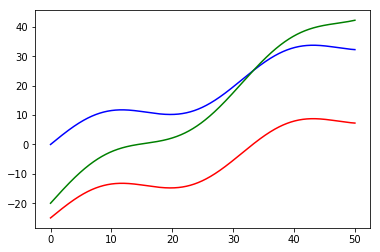

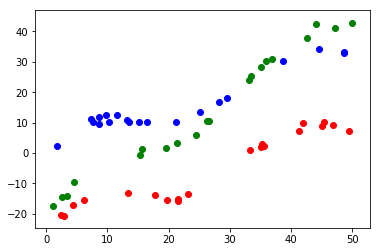

In [3]:
plt.plot(bidTrue,profitTrueOne,c='b')
plt.plot(bidTrue,profitTrueTwo,c='r')
plt.plot(bidTrue,profitTrueThree,c='g')
plt.show()

plt.scatter(bidGroupOne,profitGroupOne,c='b')
plt.scatter(bidGroupTwo,profitGroupTwo,c='r')
plt.scatter(bidGroupThree,profitGroupThree,c='g')
plt.show()

In [4]:
bidGroupOne = np.concatenate([bidGroupOne.reshape(-1,1),
                 np.ones(profitGroupOne.shape[0]).reshape(-1,1),
                 np.zeros(profitGroupOne.shape[0]).reshape(-1,1),
                 np.zeros(profitGroupOne.shape[0]).reshape(-1,1),        
                 ],axis=1)

bidGroupTwo = np.concatenate([bidGroupTwo.reshape(-1,1),
                 np.zeros(profitGroupOne.shape[0]).reshape(-1,1),
                 np.ones(profitGroupOne.shape[0]).reshape(-1,1),
                 np.zeros(profitGroupOne.shape[0]).reshape(-1,1),        
                 ],axis=1)

bidGroupThree = np.concatenate([bidGroupThree.reshape(-1,1),
                 np.zeros(profitGroupOne.shape[0]).reshape(-1,1),
                 np.zeros(profitGroupOne.shape[0]).reshape(-1,1),
                 np.ones(profitGroupOne.shape[0]).reshape(-1,1),        
                 ],axis=1)

In [5]:
x = np.concatenate([bidGroupOne,bidGroupTwo,bidGroupThree])
y = np.concatenate([profitGroupOne,profitGroupTwo,profitGroupThree])
x_test = x

In [6]:
def rbf_kernel(a,b):
    a = a[:,0].reshape(-1,1)
    b = b[:,0].reshape(-1,1)
    var_k = 1.0
    l = 3.0
    z = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2.0 * a.dot(b.T)
    return var_k * np.exp(-.5 * (1.0/l**2) * z)

In [7]:
var_l = 1.0
K = rbf_kernel(bidGroupOne,bidGroupOne)
K += np.eye(bidGroupOne.shape[0])*var_l
K = np.linalg.inv(K)

K_s = rbf_kernel(bidGroupOne,bidGroupOne)
meanOne = K_s.dot(K).dot(profitGroupOne)

var_l = 1.0
K = rbf_kernel(bidGroupTwo,bidGroupTwo)
K += np.eye(bidGroupTwo.shape[0])*var_l
K = np.linalg.inv(K)

K_s = rbf_kernel(bidGroupTwo,bidGroupTwo)
meanTwo = K_s.dot(K).dot(profitGroupTwo)

var_l = 1.0
K = rbf_kernel(bidGroupThree,bidGroupThree)
K += np.eye(bidGroupThree.shape[0])*var_l
K = np.linalg.inv(K)

K_s = rbf_kernel(bidGroupThree,bidGroupThree)
meanThree = K_s.dot(K).dot(profitGroupThree)

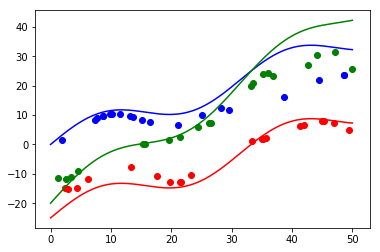

In [8]:
plt.plot(bidTrue,profitTrueOne,c='b')
plt.plot(bidTrue,profitTrueTwo,c='r')
plt.plot(bidTrue,profitTrueThree,c='g')
plt.scatter(bidGroupOne[:,0],meanOne,c='b')
plt.scatter(bidGroupTwo[:,0],meanTwo,c='r')
plt.scatter(bidGroupThree[:,0],meanThree,c='g')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

true = np.concatenate([profitGroupOne,profitGroupTwo,profitGroupThree])
pred = np.concatenate([meanOne,meanTwo,meanThree])

mean_squared_error(true, pred)

28.481625744662974

In [10]:
def rbf_kernel2(a,b):
    a1 = a[:,0].reshape(-1,1)
    b1 = b[:,0].reshape(-1,1)
    
    a2 = a[:,1].reshape(-1,1)
    b2 = b[:,1].reshape(-1,1)
    
    a3 = a[:,2].reshape(-1,1)
    b3 = b[:,2].reshape(-1,1)
    
    a4 = a[:,3].reshape(-1,1)
    b4 = b[:,3].reshape(-1,1)
    
    var_k = 1.0
    l = 5.0
    z = np.sum(a1**2,1).reshape(-1,1) + np.sum(b1**2,1) - 2.0 * a1.dot(b1.T)
    k1 = var_k * np.exp(-.5 * (1.0/l**2) * z)
    
    var_k = 1.0
    l = 1.0
    
    z = np.sum(a2**2,1).reshape(-1,1) + np.sum(b2**2,1) - 2.0 * a2.dot(b2.T)
    k2 = var_k * np.exp(-.5 * (1.0/l**2) * z)

    z = np.sum(a3**2,1).reshape(-1,1) + np.sum(b3**2,1) - 2.0 * a3.dot(b3.T)
    k3 = var_k * np.exp(-.5 * (1.0/l**2) * z)
    
    z = np.sum(a4**2,1).reshape(-1,1) + np.sum(b4**2,1) - 2.0 * a4.dot(b4.T)
    k4 = var_k * np.exp(-.5 * (1.0/l**2) * z)
    
    return k1 + k2*k3*k4

In [11]:
var_l = 1.0
K = rbf_kernel2(x,x)
K += np.eye(x.shape[0])*var_l
K = np.linalg.inv(K)

K_s = rbf_kernel2(x_test,x)
mean = K_s.dot(K).dot(y)

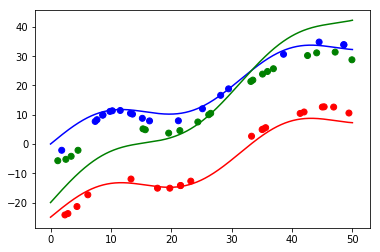

In [12]:
t = x_test[:,1:].argmax(axis=1).tolist()
a = [0,1,2]
b = ['b','r','g']
my_mapping = dict(zip(a, b))
t = [my_mapping[elem] for elem in t]


plt.plot(bidTrue,profitTrueOne,c='b')
plt.plot(bidTrue,profitTrueTwo,c='r')
plt.plot(bidTrue,profitTrueThree,c='g')
plt.scatter(x[:,0],mean,c=t)
plt.show()

In [13]:
mean_squared_error(y, mean)

20.028170271567991